In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
diamonds = pd.read_csv('diamonds.csv')

In [7]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Univariate 

## 1

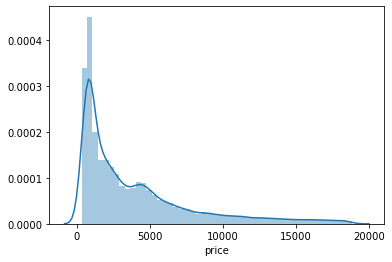

In [8]:
sns.distplot(diamonds['price'])

In [65]:
np.log10(diamonds['price'].describe())

count    4.731911
mean     3.594702
std      3.600912
min      2.513218
25%      2.977724
50%      3.380392
75%      3.726258
max      4.274689
Name: price, dtype: float64

In [23]:
(diamonds['price'].describe())

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

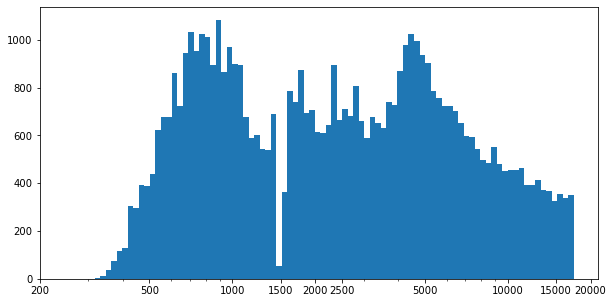

In [72]:
plt.figure(figsize=(10,5))
bins = 10**np.arange(2.5,4.25,0.02)
ticks = [200,500,1000,1500,2000,2500,5000,10000,15000,20000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=diamonds,x='price',bins=bins);
plt.xscale('log')

plt.xticks(ticks,labels);

### we met the expectations


## 2

In [74]:
diamonds['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

(0.0, 4.0)

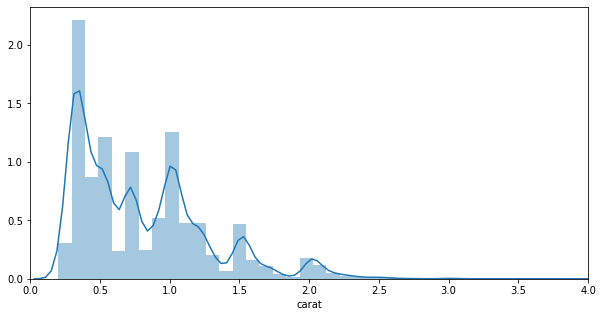

In [92]:
plt.figure(figsize=(10,5))
sns.distplot(diamonds['carat'])
plt.xlim(0,4)

In [79]:
np.log10(diamonds['carat'].describe())

count    4.731911
mean    -0.098030
std     -0.324211
min     -0.698970
25%     -0.397940
50%     -0.154902
75%      0.017033
max      0.699838
Name: carat, dtype: float64

In [197]:
diamonds['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

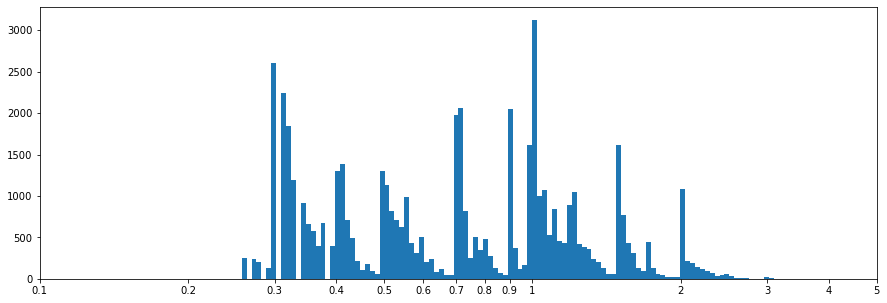

In [94]:
plt.figure(figsize=(15,5))
bins = 10**np.arange(-0.6,0.6+0.01,0.01);
ticks = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5];
labels = ['{}'.format(v) for v in ticks];
plt.hist(data = diamonds,x='carat',bins=bins);
plt.xscale('log');
plt.xticks(ticks,labels);

### we met the expectations

## 3

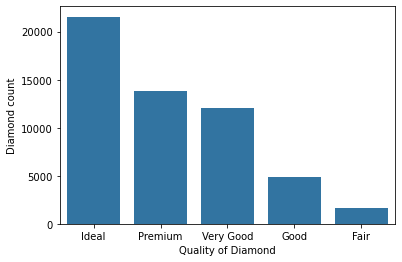

In [108]:
base_order = base_order = ['Ideal','Premium','Very Good','Good','Fair']
sns.countplot(data=diamonds,x='cut',order=base_order,color = sns.color_palette()[0]);
plt.xlabel('Quality of Diamond');
plt.ylabel('Diamond count');

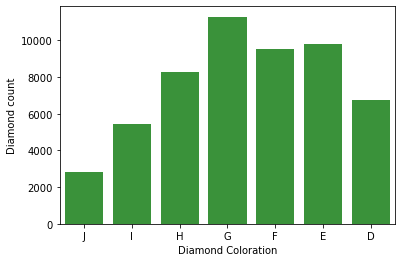

In [109]:
base_order = base_order = ['J','I','H','G','F','E','D']
sns.countplot(data=diamonds,x='color',order=base_order,color = sns.color_palette()[2]);
plt.xlabel('Diamond Coloration');
plt.ylabel('Diamond count');

In [102]:
diamonds['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

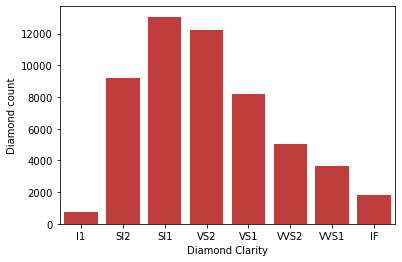

In [110]:
# I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF
base_order = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'];
sns.countplot(data=diamonds,x='clarity',order=base_order,color = sns.color_palette()[3]);
plt.xlabel('Diamond Clarity');
plt.ylabel('Diamond count');

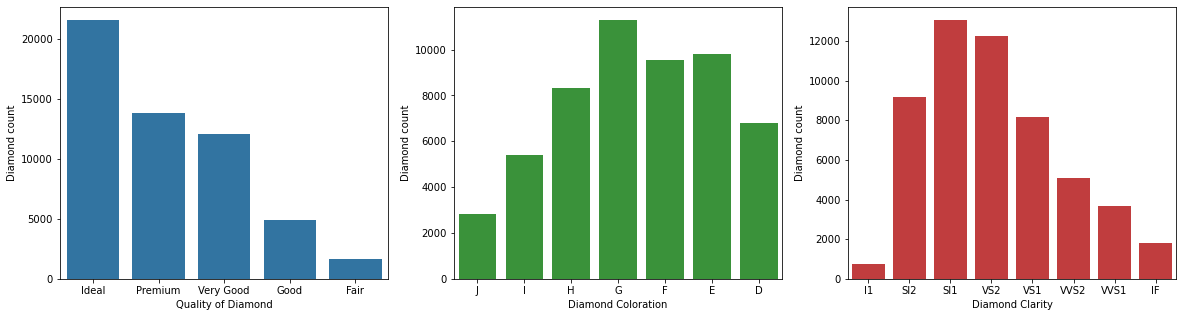

In [111]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1);
base_order = ['Ideal','Premium','Very Good','Good','Fair']
sns.countplot(data=diamonds,x='cut',order=base_order,color = sns.color_palette()[0]);
plt.xlabel('Quality of Diamond');
plt.ylabel('Diamond count');

plt.subplot(1,3,2);
base_order = base_order = ['J','I','H','G','F','E','D']
sns.countplot(data=diamonds,x='color',order=base_order,color = sns.color_palette()[2]);
plt.xlabel('Diamond Coloration');
plt.ylabel('Diamond count');

plt.subplot(1,3,3);
base_order = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'];
sns.countplot(data=diamonds,x='clarity',order=base_order,color = sns.color_palette()[3]);
plt.xlabel('Diamond Clarity');
plt.ylabel('Diamond count');

## We met the expectations


# Bi variate

# 1

In [244]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

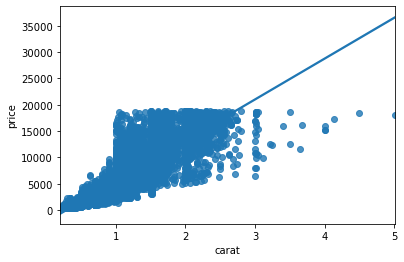

In [115]:
sns.regplot(data=diamonds,x='carat',y='price')

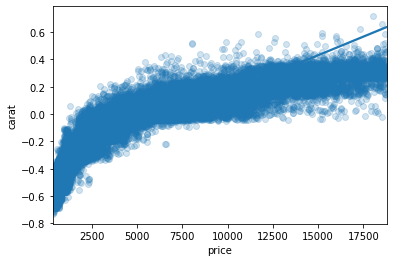

In [125]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sns.regplot(diamonds['price'], diamonds['carat'].apply(log_trans),scatter_kws={'alpha':0.2},y_jitter=0.05)
tick_locs = [0,5000,10000,15000,20000]


<Figure size 1080x360 with 0 Axes>

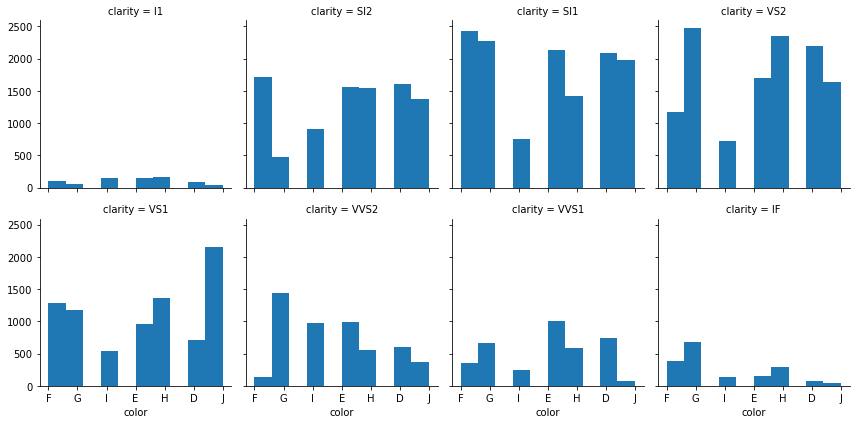

In [148]:
plt.figure(figsize=(15,5))
g = sns.FacetGrid(data=diamonds,col='clarity',col_wrap=4)
g.map(plt.hist,'color')

### 2

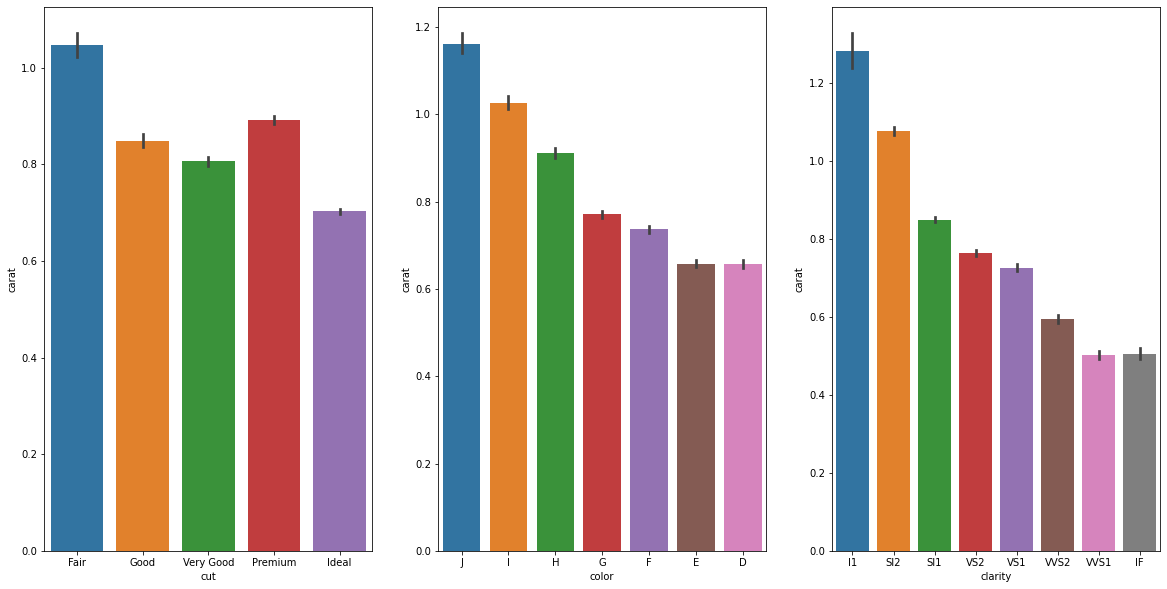

In [149]:
# bivariate plots of price vs. cut, color, clarit
plt.figure(figsize=(20,10));
plt.subplot(1,3,1);
sns.barplot(data=diamonds,x='cut',y='carat')
plt.subplot(1,3,2);
sns.barplot(data=diamonds,x='color',y='carat')
plt.subplot(1,3,3);
sns.barplot(data=diamonds,x='clarity',y='carat')

# Multivariate

In [154]:
diamonds[]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### without log_trans

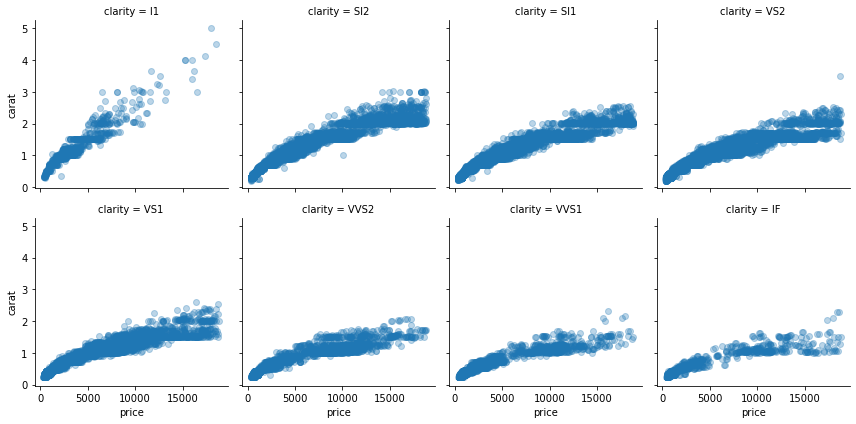

In [190]:

g = sns.FacetGrid(data=diamonds,col='clarity',margin_titles=True,col_wrap=4)
g.map(plt.scatter,'price','carat',alpha=0.3)

### with log trans

In [274]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

In [276]:
diamonds['log_carat'] = diamonds['carat'].apply(log_trans)

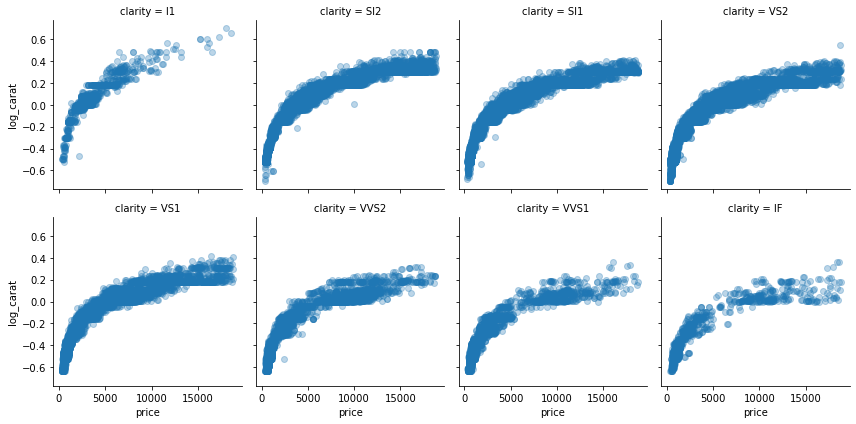

In [277]:
g = sns.FacetGrid(data=diamonds,col='clarity',margin_titles=True,col_wrap=4)
g.map(plt.scatter,'price','log_carat',alpha=0.3)

## 2

In [199]:
diamonds['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [237]:
diamonds_new = diamonds[diamonds['carat'].between(1,2)]

In [238]:
diamonds_new['carat'].describe()

count    17171.000000
mean         1.233071
std          0.245024
min          1.000000
25%          1.020000
50%          1.150000
75%          1.500000
max          2.000000
Name: carat, dtype: float64

In [242]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds_new[var] = diamonds_new[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds_new[var] = diamonds_new[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

<ipython-input-242-646177fdb156>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_new[var] = diamonds_new[var].astype(ordered_var)


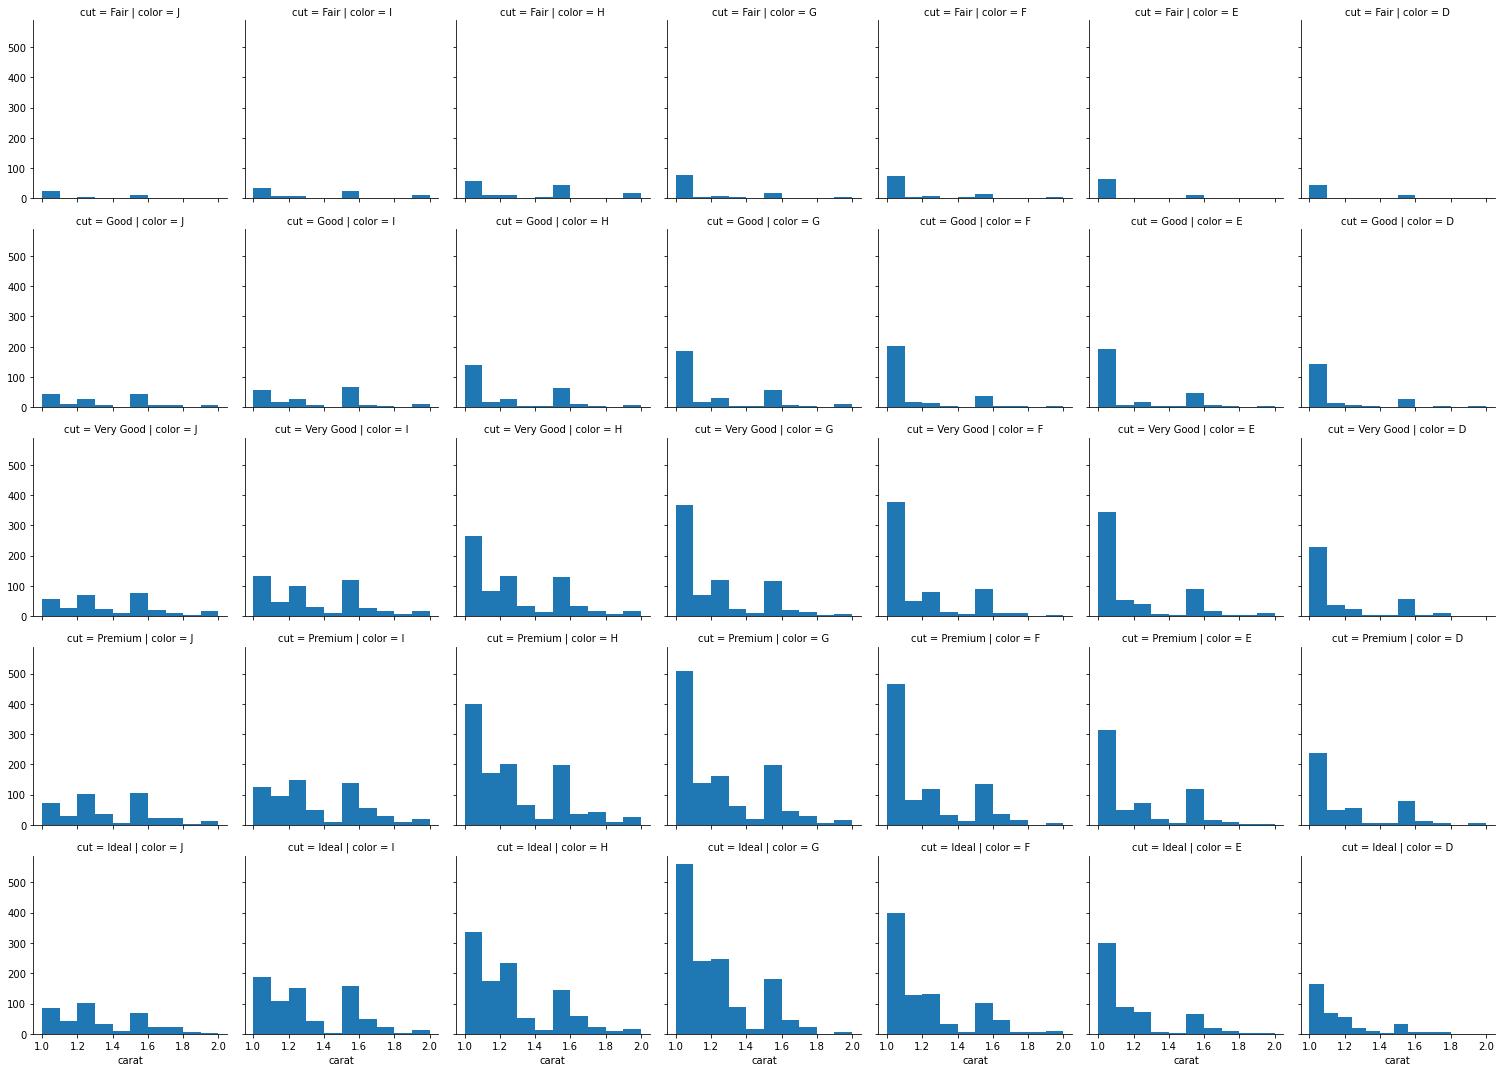

In [250]:
g = sns.FacetGrid(data=diamonds[diamonds['carat'].between(1,2)],col='color',row='cut')
g.map(plt.hist,'carat')

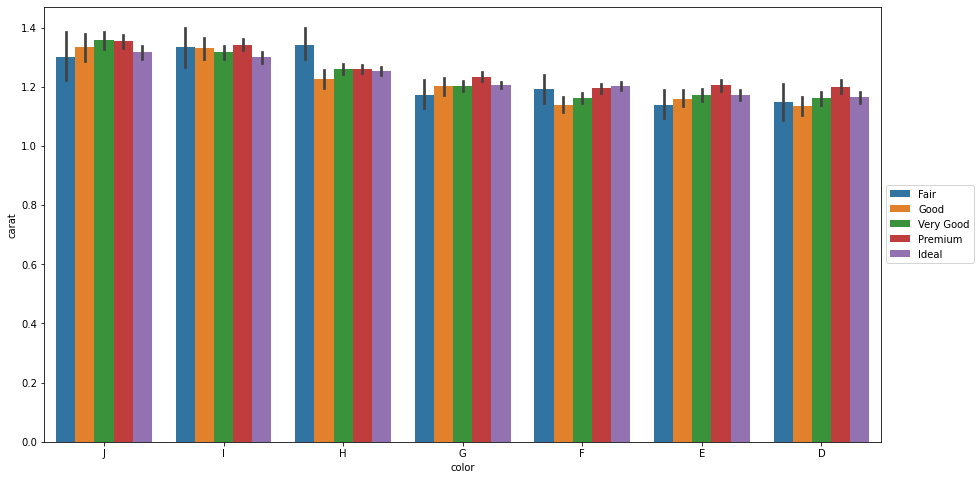

In [273]:
plt.figure(figsize=(15,8))
sns.barplot(data=diamonds[diamonds['carat'].between(1,2)],x='color',y='carat',hue='cut')
plt.legend(loc=6, bbox_to_anchor = (1.0, 0.5))

#### using a point plot

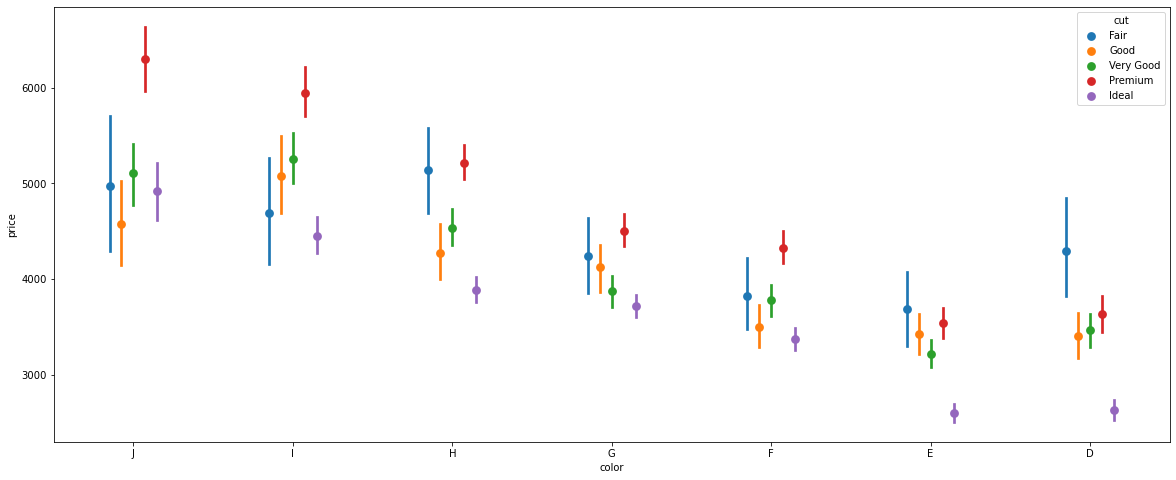

In [283]:
plt.figure(figsize=(20,8))
sns.pointplot(data=diamonds,x='color',y='price',hue='cut',linestyles="",dodge=0.3)

# necessary polishing

In [284]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [286]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [288]:
np.log10(diamonds['price'].describe())

count    4.731911
mean     3.594702
std      3.600912
min      2.513218
25%      2.977724
50%      3.380392
75%      3.726258
max      4.274689
Name: price, dtype: float64

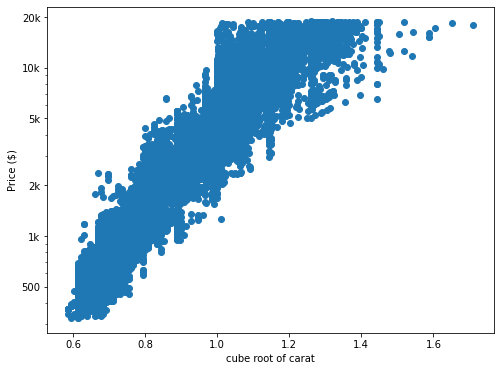

In [301]:
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price')

plt.xlabel('cube root of carat')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')

plt.show()

In [303]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]

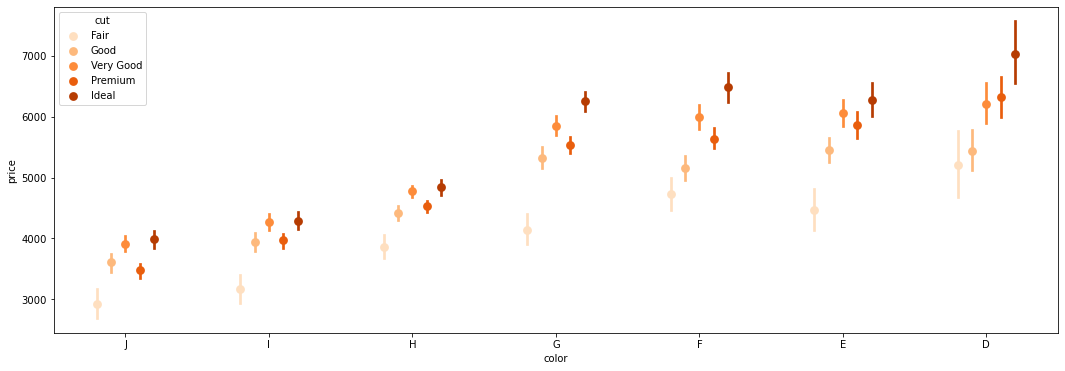

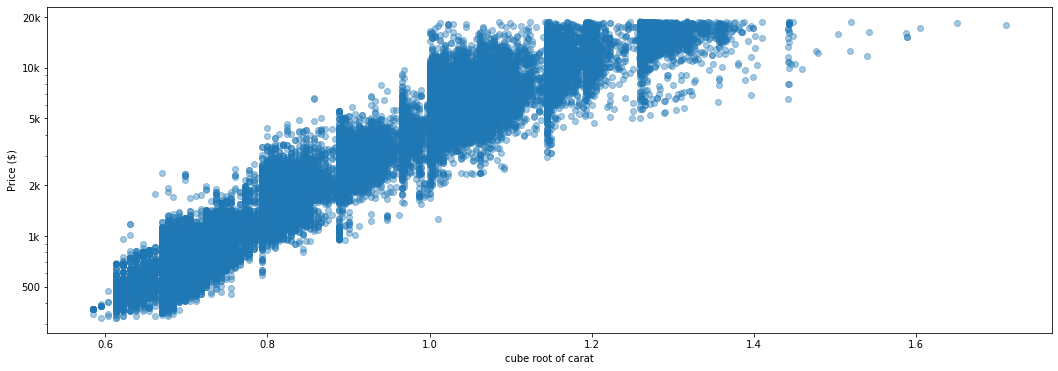

In [308]:
plt.figure(figsize = [18,6])

ax = sns.pointplot(data = diamonds_1c, x = 'color', y = 'price', hue = 'cut',linestyles='',dodge=0.4,palette='Oranges')

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [18, 6])

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price',alpha=0.4)

plt.xlabel('cube root of carat')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')

plt.show()
ax.set_yticklabels([], minor = True)

plt.show();